<a href="https://colab.research.google.com/github/rsonar821/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are 2 types of tumors:
1. Benign Tumor: It is non-cancerous and the growth does not spread.
2. Malignant Tumor: It is cancerous and the growth spreads.

There are 3 types of Breast Cells:
1. Normal Cell
2. Non-Invasive Cancer: It does not spread and remain contained in a region.
3. Invasive Cancer: It can be termed as the last stage where cells start spreading.

How dense the tissues are?
1. <25% Density: Fatty Breast Tissue (Level 1)
2. <50% Density: Scattered Density (Level 2)
3. Greater than 50% Density: Heterogeneously Dense (Level 3)
4. Greater than 75% Density: Extremely Dense (Level 4)

Last Stage: Metastatic Breast Carcinoma

In [ ]:
#For Data Frames
import pandas as pd

#For numerical calculations(arrays)
import numpy as np

#For importing one of the in-built datasets
from sklearn.datasets import load_breast_cancer

#For scaling all the values between -1 and +1
from sklearn.preprocessing import StandardScaler

#For Neural Networks (Deep Learning)
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

Data is in the form of dictionary

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#There are total 569 tumors to be studied
#Each tumor has 30 attributes
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
#There are 569 tumors to be analysed and there are 30 features for each tumor
print(data['data'].shape)

(569, 30)


In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#All the features of 1st tumor
data['data'][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
#Mapping all the features of the first tumor
j=0
for i in data['feature_names']:
  print(i, ":", data['data'][0][j])
  j+=1 

mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [ ]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data['filename']

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [ ]:
feature = data['data']

In [ ]:
label = data['target']

In [ ]:
feature

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
feature.shape

(569, 30)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
label.shape

(569,)

In [ ]:
scale = StandardScaler()

feature = scale.fit_transform(feature)

In [ ]:
feature

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
j=0
for i in data['feature_names']:
  print(i, ":", feature[0][j])
  j+=1

mean radius : 1.0970639814699807
mean texture : -2.0733350146975935
mean perimeter : 1.2699336881399383
mean area : 0.9843749048031144
mean smoothness : 1.568466329243428
mean compactness : 3.2835146709868264
mean concavity : 2.652873983743168
mean concave points : 2.532475216403245
mean symmetry : 2.2175150059646405
mean fractal dimension : 2.255746885296269
radius error : 2.4897339267376193
texture error : -0.5652650590684639
perimeter error : 2.833030865855184
area error : 2.4875775569611043
smoothness error : -0.21400164666895383
compactness error : 1.3168615683959484
concavity error : 0.72402615808036
concave points error : 0.6608199414286064
symmetry error : 1.1487566671861758
fractal dimension error : 0.9070830809973359
worst radius : 1.8866896251792757
worst texture : -1.3592934737640827
worst perimeter : 2.3036006236225606
worst area : 2.0012374893299207
worst smoothness : 1.3076862710715387
worst compactness : 2.616665023512603
worst concavity : 2.1095263465722556
worst conca

In [ ]:
#1: Benign
#0: Malignant
print(feature[0])
print(label[0])
print(data['target_names'][0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
0
malignant


In [ ]:
print(feature[111])
print(data['target_names'][label[111]])

[-0.42525211  0.34216066 -0.40444795 -0.49626492  0.21134135  0.31381785
  0.22223158  0.29123609 -0.27973028  1.12024604 -0.22655753  1.06347146
 -0.07675906 -0.43688969  1.95641968  0.83509374  0.63383906  1.80926437
  0.10869232  0.79285118 -0.60865486 -0.03374501 -0.54392553 -0.62086511
 -0.16081609 -0.18616657 -0.24269944 -0.06252381 -1.09160671  0.05066019]
benign


In [ ]:
#Converting the dataset into a dataframe using pandas
df = pd.DataFrame(feature, columns = data['feature_names'])

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Splitting data into training, validation and testing:
1. 500 rows for training
2. 35 rows for validation
3. 34 rows for testing
Total Rows: 569 

In [ ]:
feature.shape

(569, 30)

In [ ]:
label.shape

(569,)

In [ ]:
#500 Training
x_train = feature[:500]
y_train = label[:500]

#35 Validation
x_val = feature[500:535]
y_val = label[500:535]

#34 Testing
x_test = feature[535:]
y_test = label[535:]

In [ ]:
x_train.shape

(500, 30)

In [ ]:
y_train.shape

(500,)

Creating Neural Network

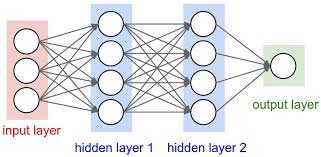

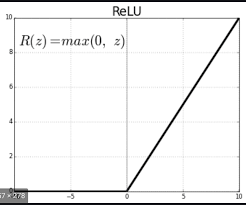

For the "Relu" Activation Function, if the value is below 0, the parameter is not considered for the further calculation and when the value goes above 0, the parameter is considered for the calculation

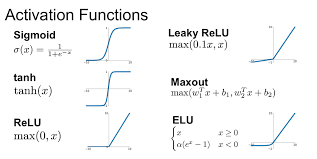

In [ ]:
#Sequential will create an empty stack where we can add as many numbers of hidden layers
model = Sequential()

In [ ]:
#Adding 1st Layer
#For the 1st hidden layer we have 15 Neurons
#30 is the number of input features
model.add(Dense(15, activation = 'relu', input_dim = 30))

In [ ]:
#Adding 2nd Layer
#For the 2nd hidden layer we have 8 Neurons

model.add(Dense(8, activation = 'relu'))

In [ ]:
#Output Layer
#Sigmoid Function is used for activation because it gives value between 0 and 1
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Compiling the complete model
#Optimizer is used to adjust and re-adjust the weights(hidden layers) when the model gives the prediction wrong.

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Training the model
#Epoch: Number of times the whole dataset has to be passed by the neural network
#Batch Size: Number of tumors that are passed through the hidden layers at a time (Default Size: 32)
             #Not compulsory to use

model.fit(x_train, y_train, batch_size=1, epochs = 10, validation_data = (x_val,y_val))

Epoch 1/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.9980 - val_loss: 0.1399 - val_accuracy: 0.9714
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 0.9980 - val_loss: 0.1388 - val_accuracy: 0.9714
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9980 - val_loss: 0.1374 - val_accuracy: 0.9714
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 0.1368 - val_accuracy: 0.9714
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.1363 - val_accuracy: 0.9714
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 0.1365 - val_accuracy: 0.9714
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 0.9980 - val_loss: 0.1363 - val_accuracy: 0.9714
Epoch 8/10
16/16 [==

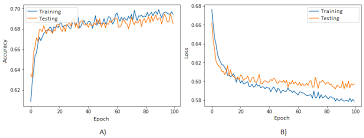

Loss has to come down and accuracy has to go up

In [ ]:
#Testing the model
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1096 - accuracy: 0.9706


[0.10959994047880173, 0.970588207244873]

For prediction from the model when we give an input of a patient to the model

In [ ]:
sample = x_test[0]

In [ ]:
sample

array([ 1.82414032,  0.36543133,  1.88778669,  1.85751441,  0.58638323,
        1.31824626,  1.50283863,  2.14814488,  1.15143953, -0.04077169,
        1.05904307, -0.4114087 ,  0.910827  ,  1.04382537, -0.82102626,
        0.03810891,  0.27043808,  0.3915519 , -0.12862155, -0.41830962,
        1.66304049, -0.03211657,  1.57682617,  1.63207582, -0.24410428,
        0.37681708,  0.82091153,  1.5256103 ,  0.28512459, -0.45750286])

In [ ]:
sample.shape

(30,)

In [ ]:
sample = np.reshape(sample, (1,30))

In [ ]:
sample.shape

(1, 30)

In [ ]:
result = model.predict(sample)[0][0]

In [ ]:
if result>0.5:
  print("Benign")
else:
  print("Malignant")

Malignant


In [ ]:
#This proves that the result is correct
y_test[0]

0

Testing model accuracy for 10 tumors

In [ ]:
for i in range(10):
  if model.predict(np.reshape(x_test[i], (1,30)))[0][0]>0.5:
    print("Benign")
  else:
    print("Malignant")

  if y_test[i] == 1:
    print("Benign")
  else:
    print("Malignant")
  print("*************")

Malignant
Malignant
*************
Malignant
Malignant
*************
Benign
Benign
*************
Benign
Benign
*************
Benign
Benign
*************
Benign
Benign
*************
Malignant
Benign
*************
Benign
Benign
*************
Benign
Benign
*************
Benign
Benign
*************
